<a href="https://colab.research.google.com/github/institutohumai/cursos-python/blob/master/MachineLearning/10_AprendizajeNoSupervisado/ejercicios/ejercicios_solucion.ipynb"> <img src='https://colab.research.google.com/assets/colab-badge.svg' /> </a>

## *Instalación/Importación de las librerías*

In [1]:
# !pip install pyeph

In [2]:
import pyeph
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from  matplotlib.ticker import FuncFormatter
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import numpy as np


## Obtención y exploración de las bases de datos

In [3]:
eph = pyeph.get(data="eph", year=2021, period=2, tipo_base='hogar') 
canastas = pyeph.get(data="canastas") # canasta basica total y alimentaria
adequi = pyeph.get(data="adulto-equivalente") # adulto equivalente

Obtenido con exito: base_hogar_2021T2.zip 
CBT y CBA mas actualizada que se obtuvo: 2022-12 
Obtenido con exito: adulto_equivalente.zip 


Imprima las 10 primeras entradas de `eph`, ejecuta el método `.info()` y averigue las columnas disponibles

In [4]:
eph.head(10)

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,REALIZADA,REGION,MAS_500,AGLOMERADO,PONDERA,IV1,...,GDECCFR,PDECCFR,ADECCFR,PONDIH,VII1_1,VII1_2,VII2_1,VII2_2,VII2_3,VII2_4
0,TQRMNOSRWHKMLOCDEFMDB00652779,2021,2,1,1,43,N,6,176,1,...,NaN,12.0,12,0,1,0,98,0,0,0
1,TQRMNOPQSHMMLPCDEFMDB00698578,2021,2,1,1,43,N,6,272,1,...,NaN,9.0,9,430,2,1,98,0,0,0
2,TQRMNOPXXHMMLPCDEFMDB00698579,2021,2,1,1,43,N,6,97,1,...,NaN,7.0,6,138,2,0,1,0,0,0
3,TQRMNOPUYHJNKOCDEHJGH00658556,2021,2,3,1,40,S,23,137,2,...,0.0,NaN,0,136,1,0,98,0,0,0
4,TQRMNOSWSHLMKSCDEGLDF00708542,2021,2,1,1,41,N,15,154,1,...,NaN,9.0,10,182,1,0,2,0,0,0
5,TQRMNOSWUHLMKSCDEGLDF00708543,2021,2,1,1,41,N,15,289,1,...,NaN,1.0,1,333,1,0,98,0,0,0
6,TQRMNOSQVHKLKTCDEGJBF00653682,2021,2,1,1,43,S,13,767,1,...,10.0,NaN,10,769,2,0,98,0,0,0
7,TQRMNORQRHLOKTCDEGJBF00708544,2021,2,1,1,43,S,13,832,1,...,5.0,NaN,6,828,1,0,97,0,0,0
8,TQRMNOQPSHKKLNCDEGJBF00653676,2021,2,1,1,43,S,13,1232,2,...,10.0,NaN,10,1317,1,2,98,0,0,0
9,TQRMNOQQXHLLLOCDEGJBF00708545,2021,2,1,1,43,S,13,500,2,...,7.0,NaN,7,510,1,0,98,0,0,0


In [5]:
eph.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15620 entries, 0 to 15619
Data columns (total 88 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CODUSU      15620 non-null  object 
 1   ANO4        15620 non-null  int64  
 2   TRIMESTRE   15620 non-null  int64  
 3   NRO_HOGAR   15620 non-null  int64  
 4   REALIZADA   15620 non-null  int64  
 5   REGION      15620 non-null  int64  
 6   MAS_500     15620 non-null  object 
 7   AGLOMERADO  15620 non-null  int64  
 8   PONDERA     15620 non-null  int64  
 9   IV1         15620 non-null  int64  
 10  IV1_ESP     21 non-null     object 
 11  IV2         15620 non-null  int64  
 12  IV3         15620 non-null  int64  
 13  IV3_ESP     25 non-null     object 
 14  IV4         15620 non-null  int64  
 15  IV5         15620 non-null  int64  
 16  IV6         15620 non-null  int64  
 17  IV7         15620 non-null  int64  
 18  IV7_ESP     11 non-null     object 
 19  IV8         15620 non-nul

In [6]:
eph.columns

Index(['CODUSU', 'ANO4', 'TRIMESTRE', 'NRO_HOGAR', 'REALIZADA', 'REGION',
       'MAS_500', 'AGLOMERADO', 'PONDERA', 'IV1', 'IV1_ESP', 'IV2', 'IV3',
       'IV3_ESP', 'IV4', 'IV5', 'IV6', 'IV7', 'IV7_ESP', 'IV8', 'IV9', 'IV10',
       'IV11', 'IV12_1', 'IV12_2', 'IV12_3', 'II1', 'II2', 'II3', 'II3_1',
       'II4_1', 'II4_2', 'II4_3', 'II5', 'II5_1', 'II6', 'II6_1', 'II7',
       'II7_ESP', 'II8', 'II8_ESP', 'II9', 'V1', 'V2', 'V21', 'V22', 'V3',
       'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14',
       'V15', 'V16', 'V17', 'V18', 'V19_A', 'V19_B', 'IX_TOT', 'IX_MEN10',
       'IX_MAYEQ10', 'ITF', 'DECIFR', 'IDECIFR', 'RDECIFR', 'GDECIFR',
       'PDECIFR', 'ADECIFR', 'IPCF', 'DECCFR', 'IDECCFR', 'RDECCFR', 'GDECCFR',
       'PDECCFR', 'ADECCFR', 'PONDIH', 'VII1_1', 'VII1_2', 'VII2_1', 'VII2_2',
       'VII2_3', 'VII2_4'],
      dtype='object')

Recomendamos ampliar la exploración de los datos a lo que considere necesario.

## Reducción a las variables de interés

Vemos columnas de interes en la documentación de la encuentas:

https://www.indec.gob.ar/ftp/cuadros/menusuperior/eph/EPH_registro_4T2021.pdf 

Las columnas de interés son las siguientes:

In [7]:
columnas = ['REGION', 'MAS_500', 'AGLOMERADO', 'IV1', 'IV2', 'IV3', 'V4',  'IV5', 'IV6', 'IV7',
 'IV8', 'IV9', 'IV10', 'IV11', 'II1', 'II2', 'II3', 'II4_3', 'II7', 'II8', 'II9', 
 'ITF', 'IPCF', 'IX_TOT']

Cree una variable llamada `eph_redux` que reduja el dataframe `eph` a las columnas de interés:

In [8]:
eph_redux = eph[columnas]

## Limpieza de los datos

1. Si durante la exploración fue minucioso habrá notado que la columna `'IPCF'` contiene valores decimales definidos por medio de comas. A fin de mantener una consistencia y facilitar futuras operaciones numéricas, convierta esas comas en puntos decimales.

2. ¿Esta transformación cambia el tipo de datos en dicha columna a `float`? Si no es así, conviértala a `float`.

3. Si exploró la columna `'MAS_500'` y leyó la documentación, sabrá que los únicos valores existentes son:

    &emsp; N ->  Conjunto de aglomerados de menos de 500.000 habitantes

    &emsp; S -> Conjunto de aglomerados de 500.000 y más habitantes

    Reemplace los valores como se indica a continuación para representarlos como booleanos:

    &emsp; N -> 0

    &emsp; S -> 1

4. Chequee por medio del método `.info()` que todas las columnas salvo `'IPCF'` sean de tipo `int64`.

In [9]:
eph_redux['MAS_500'].unique()

array(['N', 'S'], dtype=object)

In [10]:
eph_redux['IPCF'] = eph_redux['IPCF'].apply(lambda x: x.replace(',', '.'))
eph_redux['IPCF'] = eph_redux['IPCF'].astype(float)
eph_redux['MAS_500'] = eph_redux['MAS_500'].apply(lambda x: 0 if x =='N' else 1)

C:\Users\Luciano Gabbanelli\AppData\Local\Temp\ipykernel_26396\3728012145.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eph_redux['IPCF'] = eph_redux['IPCF'].apply(lambda x: x.replace(',', '.'))
C:\Users\Luciano Gabbanelli\AppData\Local\Temp\ipykernel_26396\3728012145.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eph_redux['IPCF'] = eph_redux['IPCF'].astype(float)
C:\Users\Luciano Gabbanelli\AppData\Local\Temp\ipykernel_26396\3728012145.py:3: SettingWithCopyWarning: 
A value is trying to be set 

In [11]:
eph_redux.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15620 entries, 0 to 15619
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   REGION      15620 non-null  int64  
 1   MAS_500     15620 non-null  int64  
 2   AGLOMERADO  15620 non-null  int64  
 3   IV1         15620 non-null  int64  
 4   IV2         15620 non-null  int64  
 5   IV3         15620 non-null  int64  
 6   V4          15620 non-null  int64  
 7   IV5         15620 non-null  int64  
 8   IV6         15620 non-null  int64  
 9   IV7         15620 non-null  int64  
 10  IV8         15620 non-null  int64  
 11  IV9         15620 non-null  int64  
 12  IV10        15620 non-null  int64  
 13  IV11        15620 non-null  int64  
 14  II1         15620 non-null  int64  
 15  II2         15620 non-null  int64  
 16  II3         15620 non-null  int64  
 17  II4_3       15620 non-null  int64  
 18  II7         15620 non-null  int64  
 19  II8         15620 non-nul

## Gráficas de interés

Graficamos algunas distribuciones del DataFrame `eph_redux` empleando la librería Seaborn:

1. Un histograma que muestra la distribución de valores en la columna `'IPCF'`.

2. Un histograma que muestra la distribución de valores en la columna `'IV1'`.

3. Una visualización de relaciones bivariadas entre las siguientes columnas: `'II8'`, `'II9'`, `'ITF'`, `'IPCF'`, `'IX_TOT'` y `'IV1'` (utilice la función `pairplot`). Coloree los puntos de los gráficos de dispersión según los valores de la columna `'IV1'` (este procedimiento nos permitirá entender cómo la variable 'IV1' se relaciona con las demás).

c:\Users\Luciano Gabbanelli\anaconda3\envs\Assembler\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


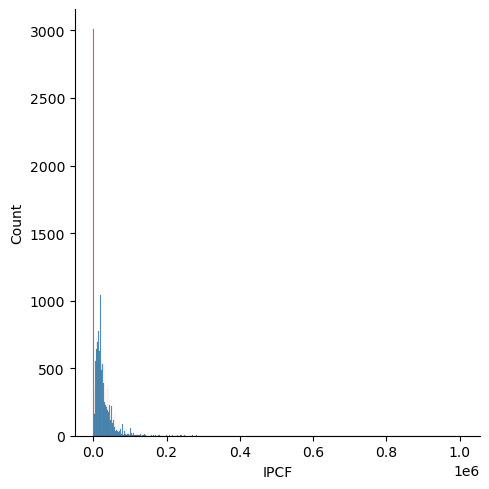

In [12]:
sns.displot(data=eph_redux, x="IPCF")

c:\Users\Luciano Gabbanelli\anaconda3\envs\Assembler\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


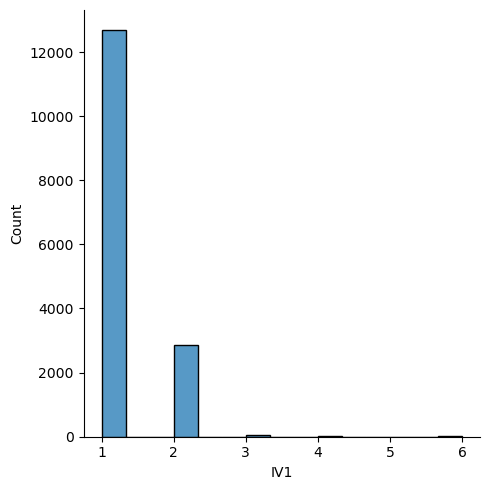

In [13]:
sns.displot(data=eph_redux, x="IV1")

c:\Users\Luciano Gabbanelli\anaconda3\envs\Assembler\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


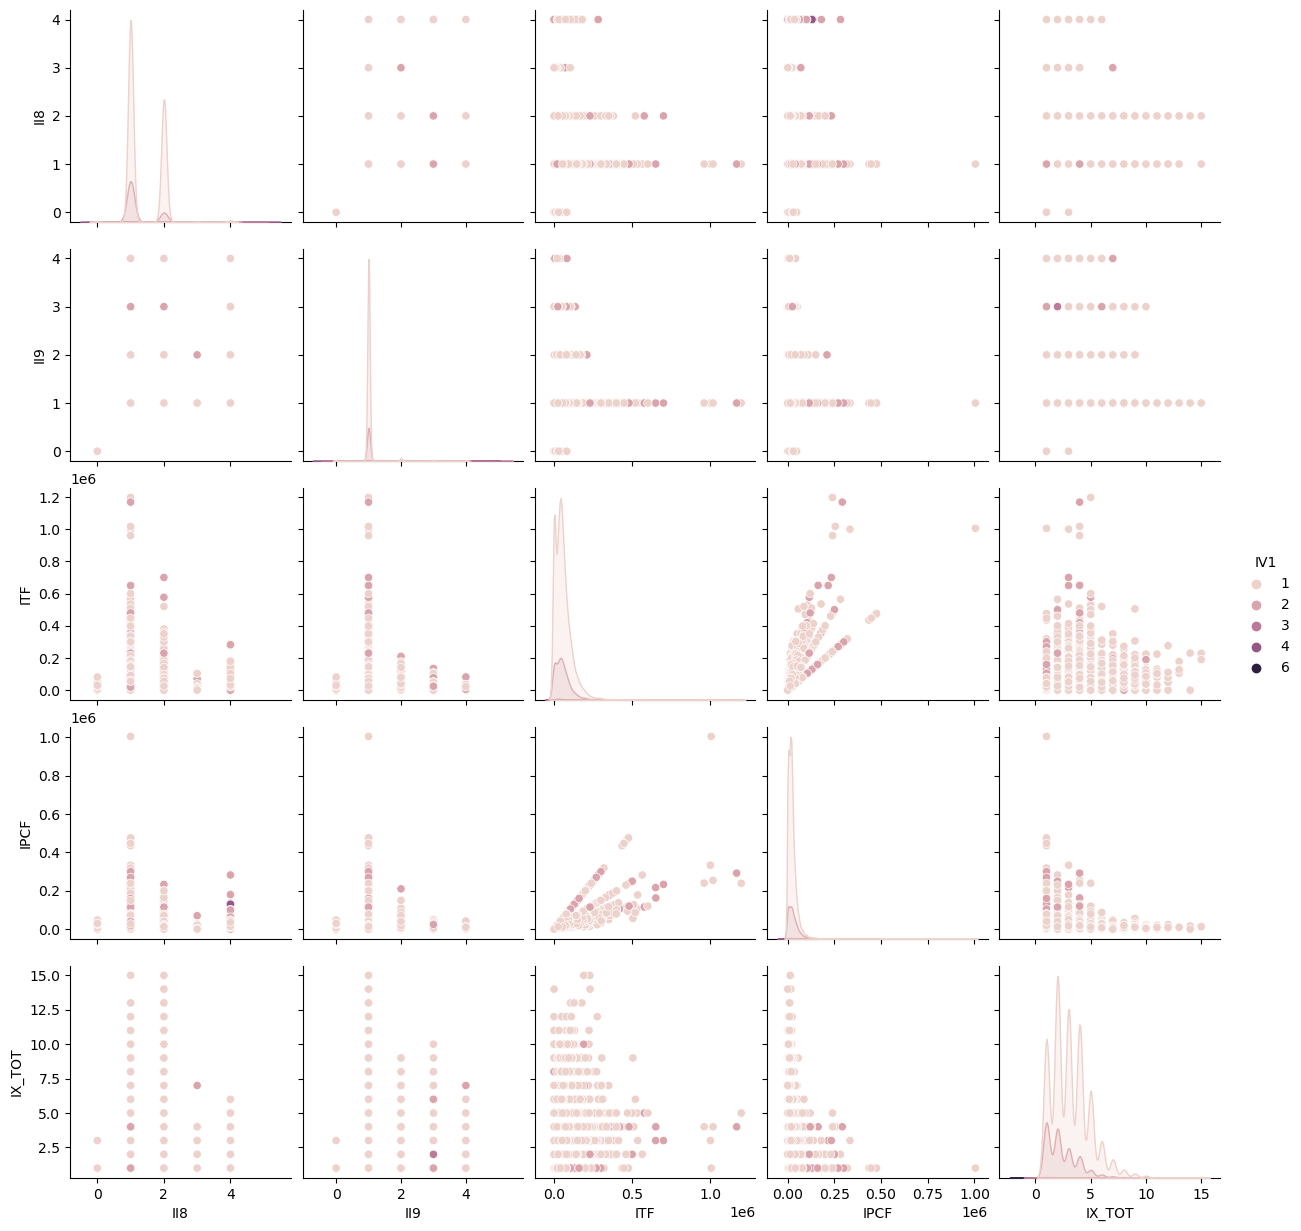

In [14]:
sns.pairplot(eph_redux[['II8', 'II9', 'ITF', 'IPCF', 'IX_TOT', "IV1"]], hue='IV1', )

## Reducción de dimensionalidades

Suponiendo que tenemos conjuntos convexos podemos reducir dimensionalidad con PCA.

Pero utilizaremos otros métodos menos estudiados:

In [15]:
# !pip install umap-learn

In [16]:
import umap

c:\Users\Luciano Gabbanelli\anaconda3\envs\Assembler\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


El dataset `eph_redux` contiene diversos indicadores socioeconómicos que pueden variar en magnitud, unidad y rango. Para muchos algoritmos de Machine Learning, es crucial que todas las características tengan la misma escala para que el modelo funcione correctamente.

**Objetivo:** Llevar a cabo una normalización standard de las características y luego aplicar la técnica de reducción de dimensionalidad UMAP para obtener proyecciones en 2D y 3D.

1. Instancie un objeto `StandardScaler` y utilice el método `fit_transform` para normalizar todas las columnas del dataset `eph_redux` utilizando Scikit-learn. Debes obtener un nuevo conjunto de datos llamado `eph_redux_scaled`.

    **Reminder:** La normalización standard ajustará cada característica para que tenga una media de 0 y una desviación estándar de 1.

2. Instancie dos objetos de la clase UMAP: uno con 2 componentes llamado `reducer_2d` y otro con 3 componentes llamado `reducer_3d`.

3. Usa el objeto `reducer_2d` para obtener una proyección en 2D de `eph_redux_scaled`. Guárdala en una variable llamada `embedding_2d`.

4. Usa el objeto `reducer_3d` para obtener una proyección en 3D de `eph_redux_scaled`. Guárdala en una variable llamada `embedding_3d`.

5. Verifica las dimensiones de `embedding_2d` y `embedding_3d` para asegurarte de que tienes una representación con las dimensiones correctas.

In [17]:
reducer_2d = umap.UMAP(n_components = 2)
reducer_3d = umap.UMAP(n_components = 3)
eph_redux_scaled = StandardScaler().fit_transform(eph_redux)
embedding_2d = reducer_2d.fit_transform(eph_redux_scaled)
embedding_3d = reducer_3d.fit_transform(eph_redux_scaled)
print(embedding_2d.shape)
print(embedding_3d.shape)

(15620, 2)
(15620, 3)


Si has llamado correctamente a las variables, las siguientes celdas plotean los resultados de la reducción dimensional.

**En 2D:**

C:\Users\Luciano Gabbanelli\AppData\Local\Temp\ipykernel_26396\3503812610.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], cmap='Spectral', s=5)


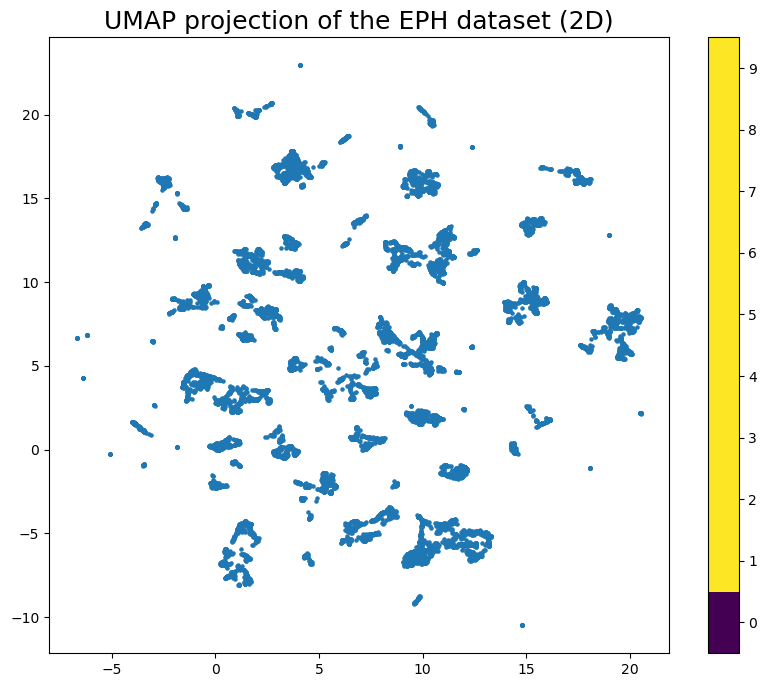

In [18]:
plt.figure(figsize=(10, 8))
plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], cmap='Spectral', s=5)
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the EPH dataset (2D)', fontsize=18)
plt.show()

**En 3D:**

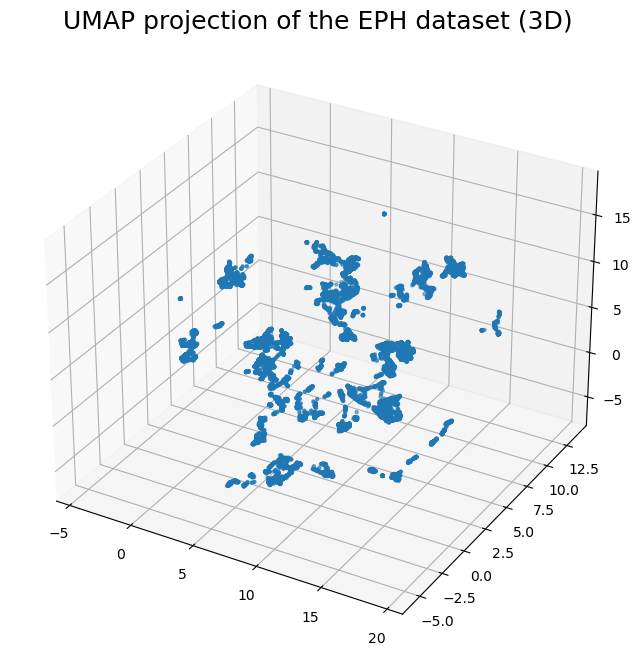

In [19]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(embedding_3d[:, 0], embedding_3d[:, 1], embedding_3d[:, 2], s=5)
plt.title('UMAP projection of the EPH dataset (3D)', fontsize=18)
plt.show()

## Clustering 

Ver métodos de sci-kit learn en:

https://scikit-learn.org/stable/modules/clustering.html 

In [20]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import homogeneity_score

## Clustering con Affinity Propagation en Datos Reducidos

Dado el conjunto de datos embedding_2d, que representa una proyección 2D de un dataset original de alta dimensión, se desea identificar patrones o agrupaciones naturales en los datos.

1. Utilice el método `AffinityPropagation` de Scikit-learn para llevar a cabo una técnica de clustering en `embedding_2d`. Ajuste el parámetro `preference` a -50 y establezca un `random_state` de 0 para garantizar la reproducibilidad.

2. Determine el número estimado de clusters obtenido.

3. Calcule el coeficiente de silueta para evaluar la calidad de los clusters formados. Use la métrica `"sqeuclidean"` para esta tarea.

4. Imprima el número estimado de clusters y el coeficiente de Silhouette.

**Nota:** El coeficiente de Silhouette (silueta) es una métrica que mide qué tan similares son los objetos dentro de su propio cluster en comparación con otros clusters. Los valores más altos indican una mejor definición de clusters.

In [21]:
af = AffinityPropagation(preference=-50, random_state=0).fit(embedding_2d)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print("Estimated number of clusters: %d" % n_clusters_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(embedding_2d, labels, metric="sqeuclidean"))

c:\Users\Luciano Gabbanelli\anaconda3\envs\Assembler\Lib\site-packages\sklearn\cluster\_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


Estimated number of clusters: 9287
Silhouette Coefficient: 0.220


Se tomó su tiempo, eh... Sabes por qué?

El tamaño de `embedding_2d` es de 15,620 muestras con 2 características cada una.

`AffinityPropagation` tiene una complejidad cuadrática respecto al número de muestras. Esto significa que el tiempo de ejecución aumentará drásticamente con la adición de más muestras. Con 15,620 muestras, el algoritmo tiene que procesar en el orden de 
$15620^2$, o más de 244 millones de pares de muestras.

😌

### Clustering con MiniBatchKMeans en Embeddings 2D

Continuemos con el mismo conjunto de datos reducido a 2 dimensiones, `embedding_2d`. La tarea es evaluar el rendimiento de `MiniBatchKMeans` con diferentes números de clusters para identificar la cantidad óptima.

Pasos a seguir:

1. Defina una lista de posibles cantidades de clusters a considerar: 2, 3, 5, 7, 10 y 13, que serán los hiperparámetros del modelo.

2. Inicialice listas vacías `iner_list` y `homo_list` para almacenar la inercia y la homogeneidad de cada configuración, respectivamente.

3. Inicialice un diccionario llamado `estimators` para guardar los modelos `MiniBatchKMeans` con diferentes números de clusters.

4. Para cada cantidad de clusters en la lista:

    * Cree una instancia de `MiniBatchKMeans` con el número actual de clusters.

    * Ajuste el modelo al conjunto de datos `embedding_2d`.

    * Almacene la inercia (`.inertia_`) del modelo en iner_list.

**Nota:** En la solución proporcionada, solo se ha trabajado con la inercia. Si se quisieras trabajar también con la homogeneidad, debería calcularla y agregarla a homo_list en este paso. Lo dejo como ejercicio.

In [22]:
clusters = [2, 3, 5, 7, 10, 13] # tomamos diferentes cantidades de clusters
iner_list = []
homo_list = []
estimators = {}
for n_clusters in clusters:
    estimator = MiniBatchKMeans(n_clusters=n_clusters)
    estimators[n_clusters] = estimator
    estimator.fit(embedding_2d)
    iner_list.append(estimator.inertia_)

c:\Users\Luciano Gabbanelli\anaconda3\envs\Assembler\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Luciano Gabbanelli\anaconda3\envs\Assembler\Lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
c:\Users\Luciano Gabbanelli\anaconda3\envs\Assembler\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Luciano Gabbanelli\anaconda3\envs\Assembler\Lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning

**Visualización de la Inercia:**

Analice `iner_list` para identificar la cantidad de clusters que minimiza la inercia. Utiliza Plotly para graficar cómo varía la inercia con diferentes números de clusters.

* En el eje X, coloca el rango de los números de clusters.

* En el eje Y, coloca los valores de inercia de la lista `iner_list`.

In [23]:
fig = px.line(x=clusters, y=iner_list)
fig.show()

En las siguientes celdas, tomemos uno de las entradas de nuestro diccionario `estimators`; `K=5`. Los valores indican a qué cluster pertenece cada punto.

Se compara con la `.shape` de `embedding_2d`.

In [24]:
type(estimators[5])

sklearn.cluster._kmeans.MiniBatchKMeans

In [25]:
estimators[5].labels_.reshape(-1, 1).shape

(15620, 1)

In [26]:
embedding_2d.shape

(15620, 2)

**Preparación de datos para la visualización:**

Crea un DataFrame llamado `data` que contenga las coordenadas de `embedding_2d` y las etiquetas del modelo con 5 clusters. 

Las columnas podrían llamarse `'x'`, `'y'` y `'cluster'` respectivamente.

Imprima las 5 primeras entradas del dataframe.

In [27]:
data = pd.DataFrame(np.column_stack([embedding_2d, estimators[5].labels_.reshape(-1, 1)]), columns =['x','y', 'cluster'])

In [28]:
data.head()

,x,y,cluster
0,10.445714,19.471497,1.0
1,-0.083346,4.293703,2.0
2,0.593218,2.859093,2.0
3,1.070084,19.911814,4.0
4,14.280808,0.137614,3.0


**Visualización de los Clusters:**

Utilizando Plotly, crea un gráfico de dispersión de los datos en `data`.

Usa las columnas `'x'` e `'y'` para los ejes X e Y respectivamente.

Colorea los puntos según la columna `'cluster'` para distinguir entre los diferentes clusters.

In [30]:
fig = px.scatter(data, x="x", y="y", color="cluster", width=800, height=600)
fig.show()